# Dataset Preparation: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### Connect Dataset:

In [2]:
DATASET_FOLDER = "data"

In [6]:
dataset = os.listdir(DATASET_FOLDER)
label_types = os.listdir(DATASET_FOLDER)
print("Class Labels for Videos : ")
print(label_types)

Class Labels for Videos : 
['abuse', 'arrest', 'arson', 'assault', 'burglary', 'explosion', 'fighting', 'normal', 'roadaccidents', 'robbery', 'shooting', 'shoplifting', 'stealing', 'vandalism']


### Dataset Analysis:

In [7]:
video_counts = []
total = 0
for i in range(len(label_types)):
    videos = len(os.listdir(os.path.join(DATASET_FOLDER, label_types[i])))
    video_counts.append(videos)
    total += videos

print(f"Total videos : {total}")
print(label_types)
print(video_counts)

Total videos : 1900
['abuse', 'arrest', 'arson', 'assault', 'burglary', 'explosion', 'fighting', 'normal', 'roadaccidents', 'robbery', 'shooting', 'shoplifting', 'stealing', 'vandalism']
[50, 50, 50, 50, 100, 50, 50, 950, 150, 150, 50, 50, 100, 50]


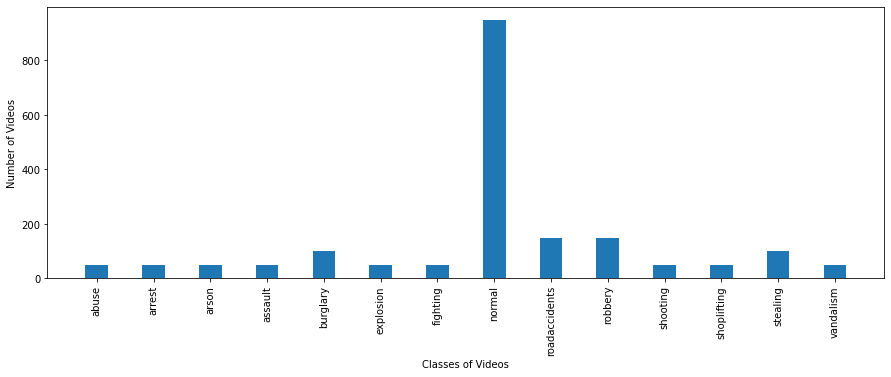

In [8]:
plt.figure(figsize=(15,5))
plt.bar(label_types, video_counts, width=0.4, align="center" )
plt.xticks(rotation=90)

plt.xlabel("Classes of Videos")
plt.ylabel("Number of Videos")
plt.show()

Text(0.5, 1.0, 'Share of Different Types Of Training Videos')

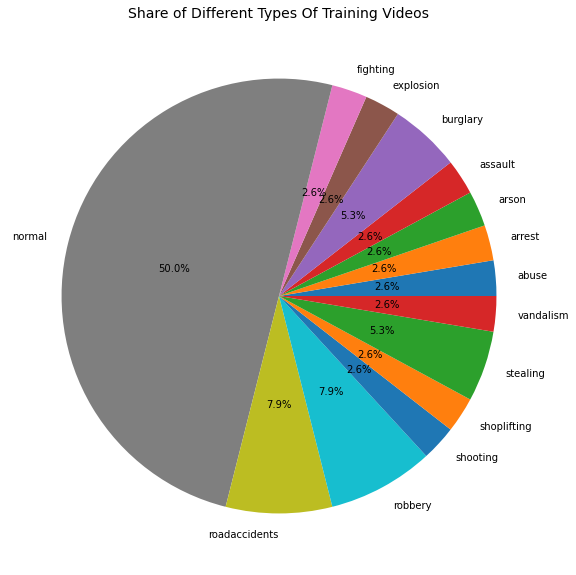

In [9]:
plt.figure(figsize=(15,10))
plt.pie(x=np.array(video_counts), autopct="%.1f%%", labels=label_types, pctdistance=0.5)
plt.title("Share of Different Types Of Training Videos", fontsize=14)

### Train and Test Dataset Split:  

In [10]:
LABEL_COL = "label"
VIDEO_INFO_COL = "video_name"

In [17]:
data = []

for i in range(len(label_types)):
    for video in os.listdir(os.path.join(DATASET_FOLDER, label_types[i])): 
        data.append( (label_types[i] , f"../input/real-time-anomaly-detection-in-cctv-surveillance/{DATASET_FOLDER}/{label_types[i]}/{video}") )

df = pd.DataFrame(data=data, columns=[ LABEL_COL, VIDEO_INFO_COL])

print(df)

          label                                         video_name
0         abuse  ../input/real-time-anomaly-detection-in-cctv-s...
1         abuse  ../input/real-time-anomaly-detection-in-cctv-s...
2         abuse  ../input/real-time-anomaly-detection-in-cctv-s...
3         abuse  ../input/real-time-anomaly-detection-in-cctv-s...
4         abuse  ../input/real-time-anomaly-detection-in-cctv-s...
...         ...                                                ...
1895  vandalism  ../input/real-time-anomaly-detection-in-cctv-s...
1896  vandalism  ../input/real-time-anomaly-detection-in-cctv-s...
1897  vandalism  ../input/real-time-anomaly-detection-in-cctv-s...
1898  vandalism  ../input/real-time-anomaly-detection-in-cctv-s...
1899  vandalism  ../input/real-time-anomaly-detection-in-cctv-s...

[1900 rows x 2 columns]


In [18]:
x = df[VIDEO_INFO_COL]
y = df[LABEL_COL]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# stratify = y  -> maintains ratio 8:2 for each class of data
train, test = train_test_split(df, test_size = 0.2, stratify=y)

In [21]:
train.value_counts(LABEL_COL)

label
normal           760
roadaccidents    120
robbery          120
burglary          80
stealing          80
abuse             40
arrest            40
arson             40
assault           40
explosion         40
fighting          40
shooting          40
shoplifting       40
vandalism         40
dtype: int64

In [22]:
test.value_counts(LABEL_COL)

label
normal           190
roadaccidents     30
robbery           30
burglary          20
stealing          20
abuse             10
arrest            10
arson             10
assault           10
explosion         10
fighting          10
shooting          10
shoplifting       10
vandalism         10
dtype: int64

Text(0.5, 1.0, 'Share of Training and Testing Videos')

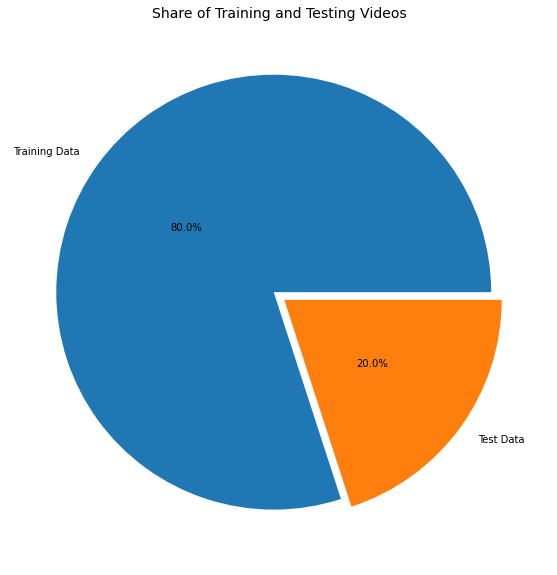

In [23]:
plt.figure(figsize=(15, 10))
plt.pie(x=np.array([len(train), len(test)]), autopct="%.1f%%", explode=[0.03, 0.03], labels=["Training Data", "Test Data"], pctdistance=0.5)
plt.title("Share of Training and Testing Videos", fontsize=14)

Now, training and testing data is successfully divided in 8:2 ratio across the all classes.

In [24]:
train.to_csv(os.path.join(DATASET_FOLDER, "train.csv"))
test.to_csv(os.path.join(DATASET_FOLDER, "test.csv"))

### Dataset Successfully created in the required format and each class label is attached in Excel sheet for reference to Video class type